In [30]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.preprocessing import StandardScaler
from PIL import Image
import matplotlib as mpl
from PIL import ImageOps
import matplotlib.patches as patches

from sklearn.linear_model import LogisticRegression,LinearRegression, SGDClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
import time

---
#### Fetch Original MNIST Dataset

In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', parser='auto', version=1)
X, y = mnist["data"], mnist["target"]
X = np.array(X)

In [3]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

---
#### Select Model Algorithm by using Orignal MNIST

In [4]:
# Logistic Regression 모델 (100)
start_time = time.time()
log_reg = LogisticRegression(max_iter=100, random_state=42)
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
end_time = time.time()
accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Accuracy: {accuracy}")
print(f"Logistic Regression Training Time: {end_time - start_time} seconds")

Logistic Regression Accuracy: 0.9255
Logistic Regression Training Time: 44.5389838218689 seconds


/Users/kangsungwook/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [5]:
# Logistic Regression 모델 (500)
start_time = time.time()
log_reg = LogisticRegression(max_iter=500, random_state=42)
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
end_time = time.time()
accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Accuracy: {accuracy}")
print(f"Logistic Regression Training Time: {end_time - start_time} seconds")

Logistic Regression Accuracy: 0.923
Logistic Regression Training Time: 228.89224672317505 seconds


/Users/kangsungwook/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [6]:
# Softmax 모델 (100)
start_time = time.time()
softmax_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs",
                                 random_state=42, max_iter=100)
softmax_reg.fit(X_train, y_train)
y_pred = softmax_reg.predict(X_test)
end_time = time.time()
accuracy = accuracy_score(y_test, y_pred)
print(f"Softmax Regression Accuracy: {accuracy}")
print(f"Softmax Regression Training Time: {end_time - start_time} seconds")

Softmax Regression Accuracy: 0.9255
Softmax Regression Training Time: 48.623701095581055 seconds


/Users/kangsungwook/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [7]:
# Softmax 모델 (500)
start_time = time.time()
softmax_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", max_iter=500,
                                random_state=42)
softmax_reg.fit(X_train, y_train)
y_pred = softmax_reg.predict(X_test)
end_time = time.time()
accuracy = accuracy_score(y_test, y_pred)
print(f"Softmax Regression Accuracy: {accuracy}")
print(f"Softmax Regression Training Time: {end_time - start_time} seconds")

Softmax Regression Accuracy: 0.923
Softmax Regression Training Time: 223.75720977783203 seconds


/Users/kangsungwook/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [8]:
# Random Forests 모델
start_time = time.time()
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)
y_pred = rf_clf.predict(X_test)
end_time = time.time()
accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Accuracy: {accuracy}")
print(f"Random Forest Training Time: {end_time - start_time} seconds")

Random Forest Accuracy: 0.9691
Random Forest Training Time: 38.490525007247925 seconds


In [9]:
# Extra-tree 모델
start_time = time.time()
et_clf = ExtraTreesClassifier(n_estimators=100, random_state=42)
et_clf.fit(X_train, y_train)
y_pred = et_clf.predict(X_test)
end_time = time.time()
accuracy = accuracy_score(y_test, y_pred)
print(f"Extra Trees Accuracy: {accuracy}")
print(f"Extra Trees Training Time: {end_time - start_time} seconds")

Extra Trees Accuracy: 0.9723
Extra Trees Training Time: 26.96840190887451 seconds


In [10]:
# MLP Classifier 모델
start_time = time.time()
mlp_clf = MLPClassifier(random_state=42)
mlp_clf.fit(X_train, y_train)
y_pred = mlp_clf.predict(X_test)
end_time = time.time()
accuracy = accuracy_score(y_test, y_pred)
print(f"MLPClassifier Accuracy: {accuracy}")
print(f"MLPClassifier Training Time: {end_time - start_time} seconds")

MLPClassifier Accuracy: 0.9609
MLPClassifier Training Time: 295.94501972198486 seconds


In [35]:
# Voting Classifier 모델
start_time = time.time()
vot_clf = VotingClassifier([('log_reg', LogisticRegression(max_iter=500, random_state=42)), ('softmax_reg', LogisticRegression(multi_class="multinomial", solver="lbfgs",random_state=42, max_iter=100)), ('rf_clf', RandomForestClassifier(n_estimators=100, random_state=42)), ('mlp_clf', MLPClassifier(random_state=42)), ('sgd_reg', SGDClassifier(random_state=42))], voting='hard')
vot_clf.fit(X_train, y_train)
y_pred = vot_clf.predict(X_test)
end_time = time.time()
accuracy = accuracy_score(y_test, y_pred)
print(f"MLPClassifier Accuracy: {accuracy}")
print(f"MLPClassifier Training Time: {end_time - start_time} seconds")

/Users/kangsungwook/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/kangsungwook/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

MLPClassifier Accuracy: 0.9444
MLPClassifier Training Time: 652.2614567279816 seconds


---
#### Fetch Handmade Test Dataset (100개)

In [57]:
IMAGE_TEST = "./mnist_data_new.npz"
h_test = np.load(IMAGE_TEST)
h_t_digit = h_test['img']
h_t_label = h_test['label']
h_t_label = h_t_label.astype(str)
print(f'shape : {h_t_digit.shape}')

shape : (100, 28, 28)


---
#### Compare test accuray (Original test data vs Handmade test data)
model -> Extra trees

In [59]:
# original 학습 , handmade test
start_time = time.time()
et_clf = ExtraTreesClassifier(n_estimators=100, random_state=42)
et_clf.fit(X_train, y_train)
y_pred = et_clf.predict(h_t_digit.reshape(-1, 784))
end_time = time.time()
accuracy = accuracy_score(h_t_label, y_pred)
print(f"Extra Trees Accuracy: {accuracy}")
print(f"Extra Trees Training Time: {end_time - start_time} seconds")

Extra Trees Accuracy: 0.1
Extra Trees Training Time: 27.32103180885315 seconds


In [39]:
# original 학습 , original test
start_time = time.time()
et_clf = ExtraTreesClassifier(n_estimators=100, random_state=42)
et_clf.fit(X_train, y_train)
y_pred = et_clf.predict(X_test)
end_time = time.time()
accuracy = accuracy_score(y_test, y_pred)
print(f"Extra Trees Accuracy: {accuracy}")
print(f"Extra Trees Training Time: {end_time - start_time} seconds")


Extra Trees Accuracy: 0.9723
Extra Trees Training Time: 27.144407033920288 seconds


---
#### Compare HM data vs MNIST data

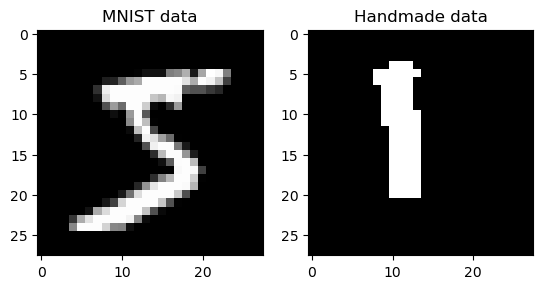

In [40]:
# MNIST data와 hand made data를 이미지를 plot해서 확인하고 pixel 값을 출력해서 어떤 차이가 있는 지 비교한다. 
X_show = X_train[0].reshape(28, 28)
plt.subplot(1,2,1)
plt.imshow(X_show, cmap='gray')
plt.title('MNIST data')

plt.subplot(1,2,2)
plt.imshow(h_t_digit[11], cmap='gray')
plt.title('Handmade data')

plt.show()

In [41]:
# pixel data를 일부 출력해서 확인한다.
print(f'MNIST : {X_show[10]}')
print(f'HM : {h_t_digit[0][10]}')

MNIST : [  0   0   0   0   0   0   0   0   0  14   1 154 253  90   0   0   0   0
   0   0   0   0   0   0   0   0   0   0]
HM : [0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


---
#### Data processing
All data must be centered
HM -> center processing
1. HM data -> add noise
2. MNIST data -> binarize
3. Compare test accuracy above 2 case

Centering HM data

In [42]:
# center image function
def center_image(selected_image):
    # 이미지의 높이, 너비 계산
    height, width = selected_image.shape
    
    nonzero_indices = np.argwhere(selected_image > 0)  # 흰색(숫자) 부분의 인덱스 찾기
    if not nonzero_indices.shape[0]:
        return selected_image
            
    top_row, left_col = nonzero_indices.min(axis=0)
    bottom_row, right_col = nonzero_indices.max(axis=0)
    
    selected_image[top_row:bottom_row + 1, left_col] = 0  # 왼쪽 세로 테두리
    selected_image[top_row:bottom_row + 1, right_col] = 0  # 오른쪽 세로 테두리
    selected_image[top_row, left_col:right_col + 1] = 0  # 위쪽 가로 테두리
    selected_image[bottom_row, left_col:right_col + 1] = 0  # 아래쪽 가로 테두리

    
    # 흰색(숫자) 부분을 따내기 위해 흰색인 부분의 인덱스 찾기
    nonzero_indices = np.argwhere(selected_image > 0)  # 흰색(숫자) 부분의 인덱스 찾기
    if not nonzero_indices.shape[0]:
        return selected_image
    top_row, left_col = nonzero_indices.min(axis=0)
    bottom_row, right_col = nonzero_indices.max(axis=0)
    

    # 흰색(숫자) 영역의 높이, 너비 계산
    white_height = bottom_row - top_row + 1
    white_width = right_col - left_col + 1

    # 중앙에 위치시키기 위한 offset 계산
    offset_h = (height - white_height) // 2
    offset_w = (width - white_width) // 2

    # 새로운 이미지 생성하고 이미지를 중앙에 위치시키기
    new_image = np.zeros((height, width))
    new_image[offset_h:offset_h + white_height, offset_w:offset_w + white_width] = \
        selected_image[top_row:bottom_row + 1, left_col:right_col + 1]

    return new_image


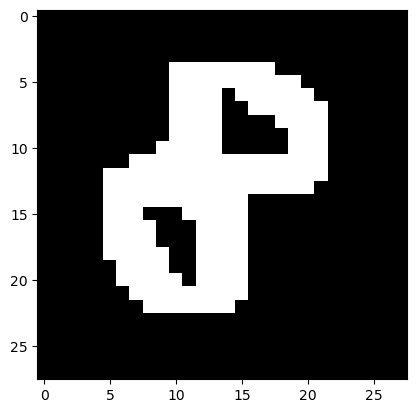

In [43]:
h_t_center = []
for image in h_t_digit:
    h_t_center.append(center_image(image))
    
h_t_center = np.array(h_t_center)
plt.imshow(h_t_center[8], cmap='gray')

1. HM data -> add noise

In [44]:
# handmade dataset에 gaussian blur를 추가할 함수들
def gauss1d(sigma):
    length = math.ceil(sigma * 6)
    if length % 2 == 0: length += 1
    kernel = np.arange(-(length // 2), (length // 2) + 1, dtype=np.float32)
    kernel = np.vectorize(lambda x: np.exp(-(x ** 2) / (2 * sigma ** 2)))(kernel)
    kernel = kernel / np.sum(kernel)
    return kernel

def gauss2d(sigma):
    kernel1d = gauss1d(sigma)
    kernel2d = np.outer(kernel1d, kernel1d.T)
    kernel2d = kernel2d / np.sum(kernel2d)
    return kernel2d

def convolved2d(array, filter):
  a = int((len(filter)-1)/2)
  img_pad = np.pad(array,((a,a),(a,a)), 'constant')

  rotate_gauss = np.rot90(filter)
  ratate_gauss = np.rot90(rotate_gauss)

  result_img = np.ones((len(array), len(array[0])))
  result_img = result_img.astype('float32')

  for i in range(len(result_img)):
    for j in range(len(result_img[0])):
      result_img[i][j] = np.sum(img_pad[i:i+len(filter), j:j+len(filter)]*rotate_gauss)

  return result_img

(100, 28, 28)


Text(0.5, 1.0, 'Handmade data')

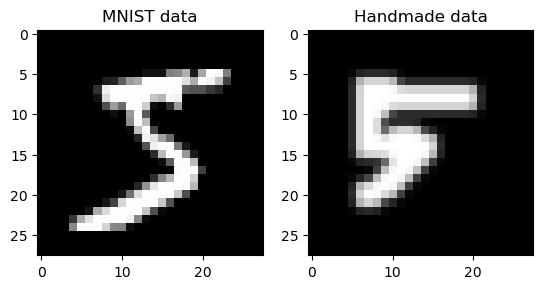

In [45]:
# Add gaussian noise
blur_img = []
gaussian_fil = gauss2d(0.6)
for sample in (h_t_center*255):
    blur_img.append(convolved2d(sample, gaussian_fil))
blur_img = np.array(blur_img)
blur_img = blur_img.astype(np.int64)
print(blur_img.shape)
plt.subplot(1,2,1)
plt.imshow(X_show, cmap='gray')
plt.title('MNIST data')

plt.subplot(1,2,2)
plt.imshow(blur_img[5], cmap='gray')
plt.title('Handmade data')

2. MNIST data -> binarize

(-0.5, 27.5, 27.5, -0.5)

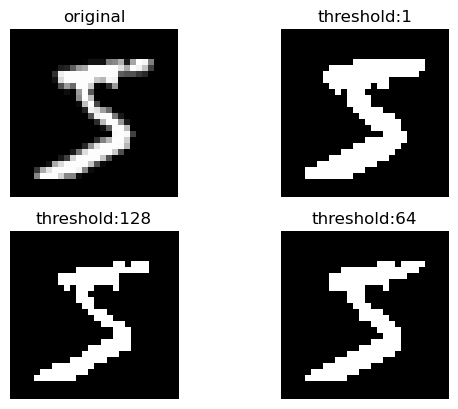

In [46]:
# 이진화 처리
threshold = 1
X_binary_1 = (X > threshold).astype(int)

A = X[0].reshape((28,28))
B = X_binary_1[0].reshape((28,28))

threshold = 128
X_binary_128 = (X > threshold).astype(int)
C = X_binary_128[0].reshape((28,28))

X_binary_64 = (X > 64).astype(int)
D = X_binary_64[0].reshape((28,28))

# Treshold 값을 달리했을 때 이미지 이진화 결과의 변화를 나타냄
plt.subplot(2,2,1)
plt.imshow(A, cmap='gray')
plt.title("original")
plt.axis('off')
plt.subplot(2,2,2)
plt.imshow(B, cmap='gray')
plt.title("threshold:1")
plt.axis('off')
plt.subplot(2,2,3)
plt.imshow(C, cmap='gray')
plt.title("threshold:128")
plt.axis('off')
plt.subplot(2,2,4)
plt.imshow(D, cmap='gray')
plt.title("threshold:64")
plt.axis('off')

3. Compare test accuracy above 2 case </br>
model -> Extra tree

In [64]:
# add noise to hand made test data
start_time = time.time()
et_clf = ExtraTreesClassifier(n_estimators=100, random_state=42)
et_clf.fit(X_train, y_train)
y_pred = et_clf.predict(blur_img.reshape(-1,784))
end_time = time.time()
accuracy = accuracy_score(h_t_label, y_pred)
print(f"Extra Trees Accuracy: {accuracy}")
print(f"Extra Trees Training Time: {end_time - start_time} seconds")

Extra Trees Accuracy: 0.46
Extra Trees Training Time: 27.006116151809692 seconds


In [65]:
# MNIST binarize
X_binary_train = X_binary_64[:60000]

start_time = time.time()
et_clf = ExtraTreesClassifier(n_estimators=100, random_state=42)
et_clf.fit(X_binary_train, y_train)
y_pred = et_clf.predict((h_t_center).reshape(-1, 784))
end_time = time.time()
accuracy = accuracy_score(h_t_label, y_pred)
print(f"Extra Trees Accuracy: {accuracy}")
print(f"Extra Trees Training Time: {end_time - start_time} seconds")


Extra Trees Accuracy: 0.56
Extra Trees Training Time: 25.01542019844055 seconds


MNST를 Binarize했을 때 성능이 더 좋다.

---
#### Fetch Handmade Dataset

In [49]:
# dataset 불러오기
# 경로는 필요에 맞게 변경 필요
IMAGE_PATH_DIGIT_TRAIN = "./handmade_data/digit_data_TrVal-1.npz"
IMAGE_PATH_DIGIT_TEST = "./handmade_data/digit_data_10_Test_1.npz"
IMAGE_PATH_OP_TRAIN = "./handmade_data/op_data_TrVal-1.npz"
IMAGE_PATH_OP_TEST = "./handmade_data/op_data_10_Test_1.npz"

hm_digit_train = np.load(IMAGE_PATH_DIGIT_TRAIN)
hm_digit_test = np.load(IMAGE_PATH_DIGIT_TEST)
hm_op_train = np.load(IMAGE_PATH_OP_TRAIN)
hm_op_test = np.load(IMAGE_PATH_OP_TEST)

# 숫자 data img, label 분리 ==> train data
hm_digit_train_data = hm_digit_train['img']
hm_digit_train_label = hm_digit_train['label']

# 숫자 data img, label 분리 ==> test data
hm_digit_test_data = hm_digit_test['img']
hm_digit_test_label = hm_digit_test['label']

# 기호 data img, label 분리 ==> train data
hm_op_train_data = hm_op_train['img']
hm_op_train_label = hm_op_train['label']

# 기호 data img, label 분리 ==> test data
hm_op_test_data = hm_op_test['img']
hm_op_test_label = hm_op_test['label']

In [50]:
# 받아온 데이터의 형태 출력
print(f'digit train : {hm_digit_train_data.shape}')
print(f'digit test : {hm_digit_test_data.shape}')
print(f'op train : {hm_op_train_data.shape}')
print(f'op test : {hm_op_test_data.shape}')

digit train : (15119, 28, 28)
digit test : (2160, 28, 28)
op train : (15329, 28, 28)
op test : (2190, 28, 28)


---
#### Data Cleaning
1. Change wrong label & delete messy data
2. Create CenterScaler class : Centering image
3. Create PixelScaler class : Binarize original MNIST</br>
    3-1. Verification of scaler pipeline
4. Verification of data cleaning

1. Change wrong label & delete messy data

In [ ]:
# digit data wrong label

In [ ]:
# op data wrong label

In [ ]:
# messy data label

2. Create CenterScaler class : Centering image

In [61]:
# Center image Estimator for pipelining
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
class CenterScaler(BaseEstimator, TransformerMixin): #28x28의 input 필요.
    def __init__(self):
        self.TransformedImage = None
        return None
        
    def fit(self, X, y=None):
        
        
        return self
    
    def transform(self, X, y=None):
        if X.ndim == 2:
            X = X.reshape(-1, 28, 28)

        CenteredImage = []
        for image in X:
            if image.max() > 1:
                CenteredImage.append(image)
            else:
                CenteredImage.append(self.center_image(image))
        return np.array(CenteredImage).reshape(-1, 784)
        
    def center_image(self, selected_image, y=None):
        # 이미지의 높이, 너비 계산
        height, width = selected_image.shape
        
        nonzero_indices = np.argwhere(selected_image > 0)  # 흰색(숫자) 부분의 인덱스 찾기
        if not nonzero_indices.shape[0]:
            return selected_image

        top_row, left_col = nonzero_indices.min(axis=0)
        bottom_row, right_col = nonzero_indices.max(axis=0)

        
        selected_image[top_row:bottom_row + 1, left_col] = 0  # 왼쪽 세로 테두리
        selected_image[top_row:bottom_row + 1, right_col] = 0  # 오른쪽 세로 테두리
        selected_image[top_row, left_col:right_col + 1] = 0  # 위쪽 가로 테두리
        selected_image[bottom_row, left_col:right_col + 1] = 0  # 아래쪽 가로 테두리
        

        # 흰색(숫자) 부분을 따내기 위해 흰색인 부분의 인덱스 찾기
        nonzero_indices = np.argwhere(selected_image > 0)  # 흰색(숫자) 부분의 인덱스 찾기
        if not nonzero_indices.shape[0]:
            return selected_image
        top_row, left_col = nonzero_indices.min(axis=0)
        bottom_row, right_col = nonzero_indices.max(axis=0)


        # 흰색(숫자) 영역의 높이, 너비 계산
        white_height = bottom_row - top_row + 1
        white_width = right_col - left_col + 1

        # 중앙에 위치시키기 위한 offset 계산
        offset_h = (height - white_height) // 2
        offset_w = (width - white_width) // 2

        # 새로운 이미지 생성하고 이미지를 중앙에 위치시키기
        new_image = np.zeros((height, width))
        new_image[offset_h:offset_h + white_height, offset_w:offset_w + white_width] = \
            selected_image[top_row:bottom_row + 1, left_col:right_col + 1]

        return new_image

3. Create PixelScaler class : Binarize Original MNIST

In [62]:
# PixelScaler Estimator for Pipelining
class PixelScaler(BaseEstimator,TransformerMixin): 
    def __init__(self):
        self.img = None
         
    def fit(self, X, y=None):
        
        return self
    
    def transform(self,X,y=None):
        if X.ndim == 3:
            X = X.reshape(-1, 784)
        PixelImage = []
        for image in X:
            if image.max() > 1:
                PixelImage.append((image>64).astype(int))
            else:
                PixelImage.append(image.astype(int))
            
        return np.array(PixelImage)

3-1. Verification of scaler pipeline </br>
    -> train with original MNIST, test with HM test(no preprocessing)

In [63]:
start_time = time.time()
verif_model = Pipeline([('cnt_scr', CenterScaler()), ('pix_scr', PixelScaler()), 
                   ('ex_clf', ExtraTreesClassifier(n_estimators=100, random_state=42))])
verif_model.fit(X_train, y_train)
y_pred = verif_model.predict(h_t_digit)
end_time = time.time()
accuracy = accuracy_score(h_t_label, y_pred)
print(f"Extra Trees Accuracy: {accuracy}")
print(f"Extra Trees Training Time: {end_time - start_time} seconds")

Extra Trees Accuracy: 0.56
Extra Trees Training Time: 21.731069803237915 seconds


4. Verification of data cleaning</br>
    Case.1 Training with MNIST, Test with cleaning data / non cleaning data</br>

여긴 어떻게 하지....?

In [ ]:
X_train_non, X_val_non = hm_digit_train_data[:11000], hm_digit_train_data[11000:], 
y_train_non, y_val_non = hm_digit_train_label[:11000], hm_digit_train_label[11000:]

In [ ]:
data_c = np.load('cleaning_data.npz')
img_c = data_c['img']
label_c = data_c['label']
X_c, y_c = data_c["img"], data_c["label"]
X_train_c, X_test_c = X_c[:11000], X_c[11000:]
y_train_c, y_test_c =  y_c[:11000], y_c[11000:]